# Figure 1

## Anisotropic KDE as density estimate for filaments

Load dependencies:

In [1]:
import pandas as pd
import numpy as np
from skimage.filters import gaussian
from skimage import exposure

import matplotlib.pyplot as plt
%matplotlib inline

Set pixel size and load file, filter outer region and uncertain localizations:

In [2]:
pixel_size = 10.0;  # nm
filename = 'data/spot1.csv'

data = pd.read_csv(filename,delimiter=',')
data = data.query('1000<`x [nm]`<17000 and 1000<`y [nm]`<17000 and `uncertainty_xy [nm]`<50')

Generate 2D image of this localization dataset:

In [3]:
x = data["x [nm]"].to_numpy()
y = data["y [nm]"].to_numpy()

xbins = np.arange(x.min(), x.max()+1, pixel_size)
ybins = np.arange(y.min(), y.max()+1, pixel_size)

img,xe,ye = np.histogram2d(y,x,bins=(ybins,xbins));
img[img<2]=0

s = 0.5;

img_filt = gaussian(img,sigma=(s,s));

Show overview with scale bar:

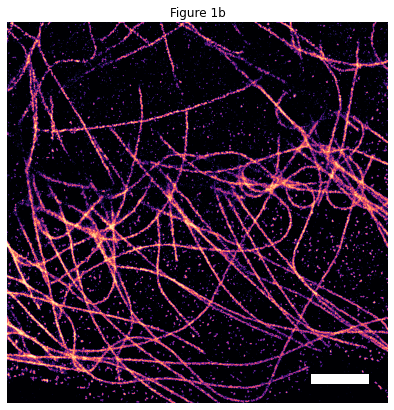

In [4]:
plt.figure(figsize=(7,7))
plt.imshow(exposure.equalize_hist(img_filt),cmap=plt.get_cmap("magma"))
plt.plot((1300,1500), (1500,1500), color='white', linewidth=10)
plt.axis("off")
plt.title("Figure 1b")
plt.show()

Histogram rendering of a complete field of view of a reconstructed dSTORM image of microtubules in a COS7 cell, scale bar = 2 μm.

----

Cut out small subset for zoomed in panels:

In [5]:
subset = data.query('11000<`x [nm]`<12560 and 11000<`y [nm]`<12560 and `uncertainty_xy [nm]`<50')

Generate 2D histogram of small subset:

In [6]:
x = subset["x [nm]"].to_numpy()
y = subset["y [nm]"].to_numpy()

xbins = np.arange(x.min(), x.max()+1, pixel_size)
ybins = np.arange(y.min(), y.max()+1, pixel_size)

subimg,xe,ye = np.histogram2d(y,x,bins=(ybins,xbins));
subimg[subimg<2]=0

Show small cut-out for illustration of method:

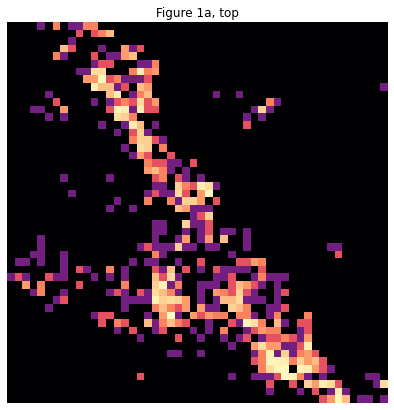

In [7]:
plt.figure(figsize=(7,7))
plt.imshow(exposure.equalize_hist(subimg[60:110,100:150]),cmap=plt.get_cmap("magma"))
plt.axis("off")
plt.title("Figure 1a, top")
plt.show()

Same in inverted colormap for illustrating the anisotropic Gaussians:

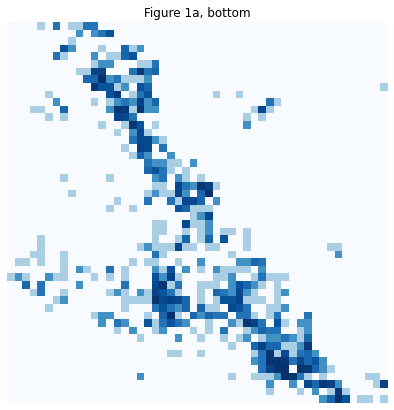

In [8]:
plt.figure(figsize=(7,7))
plt.imshow(exposure.equalize_hist(subimg[60:110,100:150]),cmap=plt.get_cmap("Blues"))
plt.axis("off")
plt.title("Figure 1a, bottom")
plt.show()

Plot small image of original unfiltered histogram with scale bar:

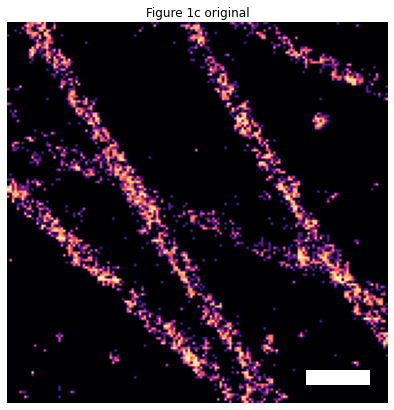

In [9]:
plt.figure(figsize=(7,7))
plt.imshow(exposure.equalize_hist(subimg),cmap=plt.get_cmap("magma"))
plt.plot((125,145), (145,145), color='white', linewidth=15)
plt.axis("off")
plt.title("Figure 1c original")
plt.show()

Filter with different Gaussian sigma:

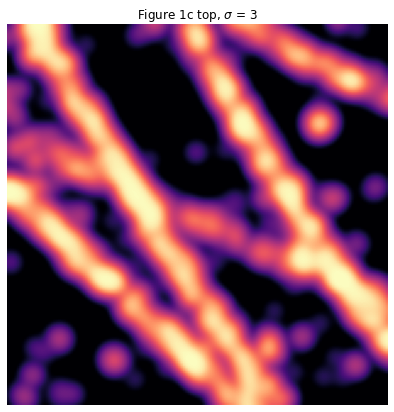

In [10]:
from skimage.filters import gaussian

s = 3;

subimg_filt = gaussian(subimg,sigma=(s,s));

plt.figure(figsize=(7,7))
plt.imshow(exposure.equalize_hist(subimg_filt),cmap=plt.get_cmap("magma"))
plt.axis("off")
plt.title("Figure 1c top, $\sigma$ = "+str(s))
plt.show()

----

Calculate anisotropic KDE on enlarged image with 100 pix padding:

In [11]:
from aniso_kde import kde_image

subimg_kde = img_filt[900:1256,900:1256]

s_kde = 1

subimg_kde = kde_image(subimg_kde,11,s_kde);

Remove padded regions:

In [12]:
subimg_kde = subimg_kde[101:-100,101:-100]

Show resulting image:

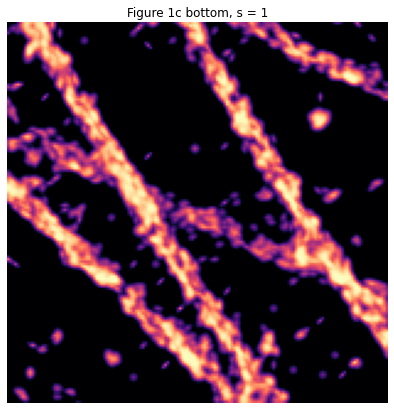

In [13]:
plt.figure(figsize=(7,7))
plt.imshow(exposure.equalize_hist(subimg_kde),cmap=plt.get_cmap("magma"))
#plt.plot((125,145), (145,145), color='white', linewidth=15)
plt.axis("off")
plt.title("Figure 1c bottom, s = "+str(s_kde))
plt.show()